In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from scipy.ndimage import measurements

In [5]:
def rand_lattice(L: int=20, p: float=0.5):
    """
    It creates a random lattice (matrix of booleans) with size L by L.
    The elements are True with probability (p) and False with probability (q=1-p).
    """


    return np.random.rand(L,L) <= p


def is_percolating(L_by_L):
    """
    checks the percolation of a lattice
    """


    labeled_lattice, num_clusters = measurements.label(L_by_L)
    if np.size(np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])) == 0:
        return 0
    else:
        return 1


def rgyration_and_s(L_by_L):
    """
    Returns an array containing the radii of gyration of all clusters in a lattice, plus their areas.

    float for the radii of gyration of non-spanning clusters.
    NaN for the radii of gyration of spanning clusters.
    """


    L = L_by_L.shape[0]
    labeled_lattice, num_clusters = measurements.label(L_by_L)
    # The next 3 lines are standard syntax for measurements.center_of_mass():
    label_list = np.arange(1, num_clusters+1)
    cm = measurements.center_of_mass(L_by_L, labels=labeled_lattice, index=label_list)
    area = measurements.sum(L_by_L, labeled_lattice, label_list)
    # The distance of every non-zero element in labeled_lattice to the center of mass
    # of its cluster is calculated and then raised to the power of 2, then summed
    # and finally put in the sum_distance2 array.
    # Note that at this step, spanning clusters are also taken into account; they will be
    # eliminated from calculations later in the function.
    sum_distance2 = np.zeros(num_clusters)

    for i in range(L):
        for j in range(L):
            # Which cluster does this element belong to? -1 for iteration purposes.
            cluster_id = labeled_lattice[i,j] - 1
            # Radius of gyration is only defined for clusters that are turned on, so (cluster_id>0),
            # but (cluster_id>=0) is written instead, again, for iteration purposes.
            if (cluster_id>=0):
                # distance to the power of 2:
                distance2 = math.dist(np.array([i,j]), cm[cluster_id]) ** 2
                sum_distance2[cluster_id] = sum_distance2[cluster_id] + distance2


    radii_of_gyration = np.sqrt(sum_distance2 / area)
    # The radii of gyration of non-spanning clusters should not be caculated,
    # so in the end, if a particular cluster_id is spanning, check and put None in its place.
    # If this last for-loop is deleted, the spanning clusters are also accounted for.
    for i in np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0]):
        radii_of_gyration[i-1] = None
        area[i-1] = None
    return radii_of_gyration, area

$\Large p=0.5$

In [9]:
probability = 0.5
num_samples = 500
# An array for Xis:
Xi_05 = np.zeros(num_samples)  # Xis for the samples
S_05 = np.zeros(num_samples)  # Average surface area of clusters in the sample
for i in range(num_samples):
    lattice = rand_lattice(L=100, p=probability)
    Xi_05[i] = np.nanmean(rgyration_and_s(lattice)[0])
    S_05[i] = np.nanmean(rgyration_and_s(lattice)[1])

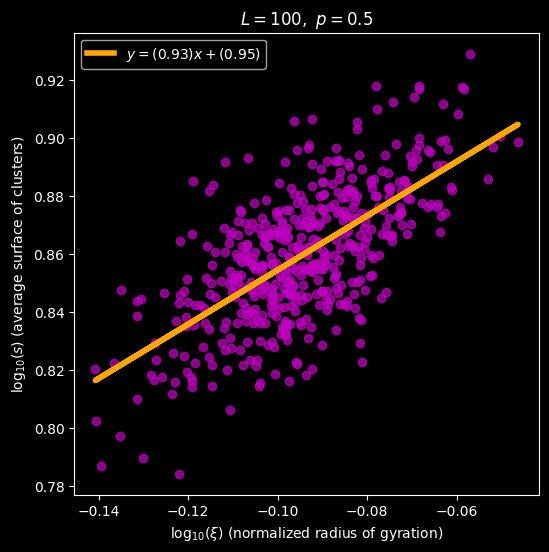

In [53]:
log_Xi_05 = np.log10(Xi_05)
log_S_05 = np.log10(S_05)
coefs = np.polynomial.polynomial.polyfit(log_Xi_05, log_S_05, deg=1)
ffit = np.polynomial.polynomial.polyval(log_Xi_05, coefs)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(log_Xi_05, log_S_05, color="m", alpha=0.7)
ax.plot(log_Xi_05, ffit, color="orange", linewidth=4, label=f"$y = ({coefs[1]:.2f})x + ({coefs[0]:.2f})$")
ax.set_title("$L=100, \ p=0.5$")
ax.set_xlabel("$\log_{10}(\\xi)$ (normalized radius of gyration)")
ax.set_ylabel("$\log_{10}(s)$ (average surface of clusters)")
ax.legend();

In [54]:
# fig.savefig("Plot4_7_1.jpg")

$\Large p=0.55$

In [85]:
# Takes 50 seconds.
probability = 0.55
num_samples = 2000
# An array for Xis:
Xi_55 = np.zeros(num_samples)  # Xis for the samples
S_55 = np.zeros(num_samples)  # Average surface area of clusters in the sample
for i in range(num_samples):
    lattice = rand_lattice(L=100, p=probability)
    Xi_55[i] = np.nanmean(rgyration_and_s(lattice)[0])
    S_55[i] = np.nanmean(rgyration_and_s(lattice)[1])

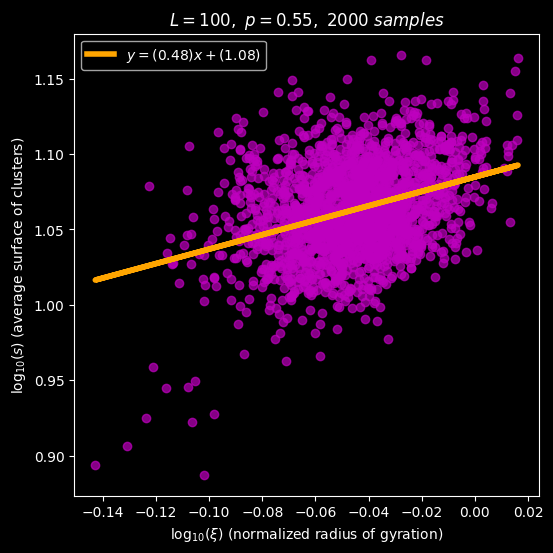

In [86]:
log_Xi_55 = np.log10(Xi_55)
log_S_55 = np.log10(S_55)
coefs = np.polynomial.polynomial.polyfit(log_Xi_55, log_S_55, deg=1)
ffit = np.polynomial.polynomial.polyval(log_Xi_55, coefs)

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(log_Xi_55, log_S_55, color="m", alpha=0.7)
ax.plot(log_Xi_55, ffit, color="orange", linewidth=4, label=f"$y = ({coefs[1]:.2f})x + ({coefs[0]:.2f})$")
ax.set_title("$L=100, \ p=0.55, \ 2000 \ samples$")
ax.set_xlabel("$\log_{10}(\\xi)$ (normalized radius of gyration)")
ax.set_ylabel("$\log_{10}(s)$ (average surface of clusters)")
ax.legend();

In [87]:
fig.savefig("Plot4_7_2_2.jpg")

$\Large p=0.59$

In [50]:
probability = 0.59
num_samples = 500
# An array for Xis:
Xi_59 = np.zeros(num_samples)  # Xis for the samples
S_59 = np.zeros(num_samples)  # Average surface area of clusters in the sample
for i in range(num_samples):
    lattice = rand_lattice(L=100, p=probability)
    Xi_59[i] = np.nanmean(rgyration_and_s(lattice)[0])
    S_59[i] = np.nanmean(rgyration_and_s(lattice)[1])

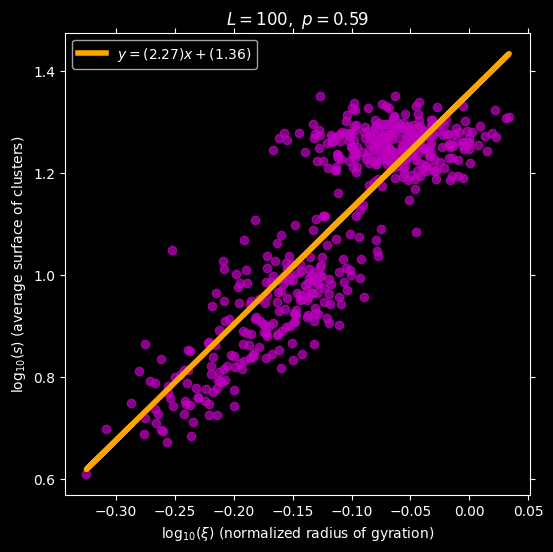

In [93]:
log_Xi_59 = np.log10(Xi_59)
log_S_59 = np.log10(S_59)
coefs = np.polynomial.polynomial.polyfit(log_Xi_59, log_S_59, deg=1)
ffit = np.polynomial.polynomial.polyval(log_Xi_59, coefs)

fig, ax = plt.subplots(figsize=(6,6))
ax.clear()
ax.scatter(log_Xi_59, log_S_59, color="m", alpha=0.7)
ax.plot(log_Xi_59, ffit, color="orange", linewidth=4, label=f"$y = ({coefs[1]:.2f})x + ({coefs[0]:.2f})$")
ax.set_title("$L=100, \ p=0.59$")
ax.set_xlabel("$\log_{10}(\\xi)$ (normalized radius of gyration)")
ax.set_ylabel("$\log_{10}(s)$ (average surface of clusters)")
ax.legend();

In [94]:
# fig.savefig("Plot4_7_3.jpg")